In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# anime = pd.read_csv('anime.csv')
# rating = pd.read_csv('rating.csv')

In [2]:
anime = pd.read_csv('/users/jjong/desktop/vscode/CWNU_ICT/anime.csv')
rating = pd.read_csv('/users/jjong/desktop/vscode/CWNU_ICT/rating.csv')

In [3]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [10]:
rate = rating.copy()
rating

,user_id,anime_id,rating
0,1,20,5
1,1,24,5
2,1,79,5
3,1,226,5
4,1,241,5
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [5]:
rating = rating[rating['rating'] != -1]
rating

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


<Axes: >

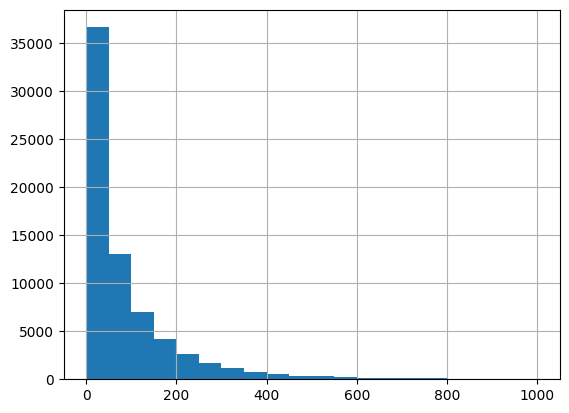

In [6]:
view_per_user = rating.groupby('user_id')['rating'].count()
view_per_user.hist(bins=20, range=(0,1000))

<Axes: >

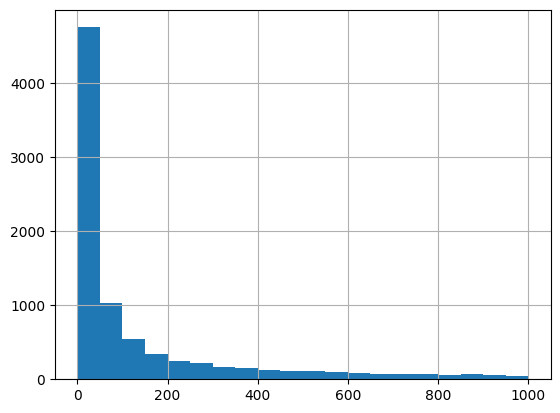

In [7]:
view_per_anime = rating.groupby('anime_id')['rating'].count()
view_per_anime.hist(bins=20, range=(0,1000))
# 롱테일 문제 발견

In [8]:
# 유효값 필터링
# 50명 이상이 본 애니메만 남김
view_per_anime_df = pd.DataFrame(view_per_anime)
popular_anime = view_per_anime_df[view_per_anime_df['rating'] >= 50].index 
popular_anime

Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,    19,
       ...
       33372, 33421, 33524, 33558, 33569, 33606, 33964, 34085, 34103, 34240],
      dtype='int64', name='anime_id', length=5172)

In [9]:
# 너무 적게 평가한 유저 버림
view_per_user_df = pd.DataFrame(view_per_user)
viewers = view_per_user_df[view_per_user_df['rating'] >= 20].index
viewers

Index([    3,     5,     7,    11,    12,    14,    17,    18,    19,    21,
       ...
       73499, 73500, 73501, 73502, 73503, 73504, 73507, 73510, 73513, 73515],
      dtype='int64', name='user_id', length=47153)

In [11]:
filtered_rating = rating[rating['user_id'].isin(viewers)]
filtered_rating

,user_id,anime_id,rating
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9
...,...,...,...
7813730,73515,13659,8
7813731,73515,14345,7
7813732,73515,16512,7
7813733,73515,17187,9


In [12]:
rating_matrix = filtered_rating.pivot_table(values='rating', index='user_id', columns='anime_id')
rating_matrix = rating_matrix.fillna(0)
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73504,10.0,10.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73507,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# rating_matrix.loc[7]
# rating_matrix[rating_matrix.index != 7]

In [22]:
def similar_users(user_id, matrix, k=10):
    # 선택된 사용자의 평가정보
    user = matrix[matrix.index == user_id]
    # 나머지 사용자의 평가정보
    other_user = matrix[matrix.index != user_id]

    # 코사인 유사도 계산
    similarity = cosine_similarity(user, other_user)[0]
    # 다른 사용자 ID 인덱스 생성
    other_user_list = other_user.index

    # 다른 사용자와의 유사도 딕셔너리
    user_simirality = dict(zip(other_user_list, similarity))
    user_simirality = pd.Series(user_simirality)
    
    # 상위 k명 찾기
    top_user = user_simirality.sort_values(ascending=False)[:k]
    return top_user


def recommend_contents(user_id, matrix, k=10, n=10):
    # 성향이 비슷한 사용자 상위 k명 찾기
    top_user = similar_users(user_id, matrix, k=k)
    # 성향이 비슷한 사용자의 사용자-콘텐츠 행렬
    u_c_matrix = matrix.loc[top_user.index]
    # weighted_u_c_matrix = u_c_matrix.apply(lambda x: x * top_user)
    
    # 넘파이로 하는 방법
    weighted_u_c_matrix_np = u_c_matrix.values * top_user.values.reshape(-1,1)
    # 결과를 다시 pandas DataFrame으로 변환
    weighted_u_c_matrix = pd.DataFrame(weighted_u_c_matrix_np, index=u_c_matrix.index, columns=u_c_matrix.columns)

    score = weighted_u_c_matrix.sum(axis=0)
    
    # 안 본 콘텐츠 필터링
    user = matrix.loc[user_id]
    nonwatch_score = score[user == 0]
    recom_contents = nonwatch_score.sort_values(ascending=False)[:n]
    return recom_contents


recommend_contents(7, rating_matrix, k=100)

anime_id
6547     310.579231
14813    308.327827
16498    300.540989
4224     296.601623
23847    296.563292
8841     294.326921
22199    292.524250
20785    292.176792
9253     291.716776
13759    286.909028
dtype: float64

In [26]:
recom_list = recommend_contents(12, rating_matrix, k=100, n=10)
anime_ = anime.set_index('anime_id')
anime_.loc[recom_list.index]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
11741,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller",TV,12,8.73,340973
226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055
10087,Fate/Zero,"Action, Fantasy, Supernatural",TV,13,8.51,453630
9919,Ao no Exorcist,"Action, Demons, Fantasy, Shounen, Supernatural",TV,25,7.92,583823
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


In [11]:
rate['rating'] = rate['rating'].apply(lambda x: 5 if x == -1 else x)
rate

,user_id,anime_id,rating
0,1,20,5
1,1,24,5
2,1,79,5
3,1,226,5
4,1,241,5
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


<Axes: >

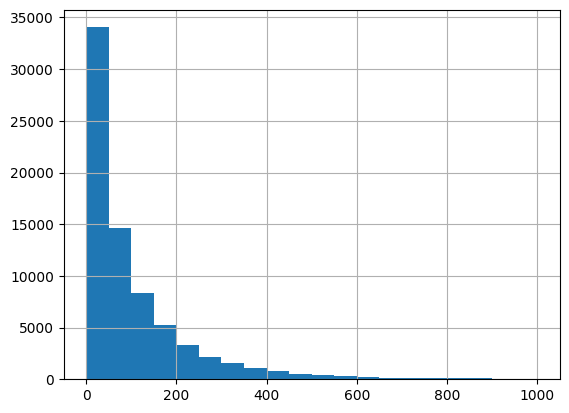

In [12]:
view_per_user = rate.groupby('user_id')['rating'].count()
view_per_user.hist(bins=20, range=(0,1000))

<Axes: >

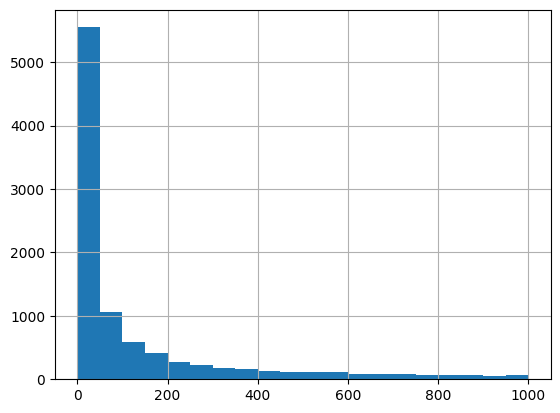

In [13]:
view_per_anime = rate.groupby('anime_id')['rating'].count()
view_per_anime.hist(bins=20, range=(0,1000))
# 롱테일 문제 발견

In [16]:
pd.DataFrame(rate.groupby('anime_id')['rating'].count())

,rating
anime_id,
1,15509
5,6927
6,11077
7,2629
8,413
...,...
34367,5
34412,1
34475,4


In [17]:
# 유효값 필터링
# 50명 이상이 본 애니메만 남김
view_per_anime_df = pd.DataFrame(view_per_anime)
popular_anime = view_per_anime_df[view_per_anime_df['rating'] >= 50].index 
popular_anime

Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,    19,
       ...
       33524, 33558, 33569, 33606, 33798, 33934, 33964, 34085, 34103, 34240],
      dtype='int64', name='anime_id', length=5651)

In [22]:
# # 너무 적게 평가한 유저 버림
# view_per_user_df = pd.DataFrame(view_per_user)
# viewers = view_per_user_df[view_per_user_df['rating'] >= 20].index
# viewers

In [27]:
rating_matrix = filtered_rating.pivot_table(values='rating', index='user_id', columns='anime_id')
rating_matrix = rating_matrix.fillna(0)
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73504,10.0,10.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73507,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def similar_users(user_id, matrix, k=10):
    # 선택된 사용자의 평가정보
    user = matrix[matrix.index == user_id]
    # 나머지 사용자의 평가정보
    other_user = matrix[matrix.index != user_id]

    # 코사인 유사도 계산
    similarity = cosine_similarity(user, other_user)[0]
    # 다른 사용자 ID 인덱스 생성
    other_user_list = other_user.index

    # 다른 사용자와의 유사도 딕셔너리
    user_simirality = dict(zip(other_user_list, similarity))
    user_simirality = pd.Series(user_simirality)
    
    # 상위 k명 찾기
    top_user = user_simirality.sort_values(ascending=False)[:k]
    return top_user


def recommend_contents(user_id, matrix, k=10, n=10):
    # 성향이 비슷한 사용자 상위 k명 찾기
    top_user = similar_users(user_id, matrix, k=k)
    # 성향이 비슷한 사용자의 사용자-콘텐츠 행렬
    u_c_matrix = matrix.loc[top_user.index]
    # weighted_u_c_matrix = u_c_matrix.apply(lambda x: x * top_user)
    
    # 넘파이로 하는 방법
    weighted_u_c_matrix_np = u_c_matrix.values * top_user.values.reshape(-1,1)
    # 결과를 다시 pandas DataFrame으로 변환
    weighted_u_c_matrix = pd.DataFrame(weighted_u_c_matrix_np, index=u_c_matrix.index, columns=u_c_matrix.columns)

    score = weighted_u_c_matrix.sum(axis=0)
    
    # 안 본 콘텐츠 필터링
    user = matrix.loc[user_id]
    nonwatch_score = score[user == 0]
    recom_contents = nonwatch_score.sort_values(ascending=False)[:n]
    return recom_contents


recommend_contents(7, rating_matrix, k=100)

anime_id
6547     298.036903
14813    294.372950
16498    288.397213
13759    284.857870
8841     284.065307
4224     281.440551
23847    281.416427
5081     278.615986
20785    277.508886
10790    274.971309
dtype: float64

In [29]:
anime_ = anime.set_index('anime_id')

In [33]:
recom_list = recommend_contents(73504, rating_matrix, k=100, n=10)
anime_.loc[recom_list.index]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
889,Black Lagoon,"Action, Seinen",TV,12,8.17,332562
2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962
1519,Black Lagoon: The Second Barrage,"Action, Seinen",TV,12,8.30,203233
245,Great Teacher Onizuka,"Comedy, Drama, School, Shounen, Slice of Life",TV,43,8.77,268487
431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186
1818,Claymore,"Action, Adventure, Demons, Fantasy, Shounen, S...",TV,26,7.92,316853
202,Wolf&#039;s Rain,"Action, Adventure, Drama, Fantasy, Mystery, Sc...",TV,26,7.93,171863
317,Final Fantasy VII: Advent Children,"Action, Fantasy, Super Power",Movie,1,7.94,138659
1210,NHK ni Youkoso!,"Comedy, Drama, Psychological, Romance",TV,24,8.40,291228


In [36]:
recom_list

anime_id
889     217.975130
2001    202.354311
1519    191.286761
245     180.151160
431     172.461238
1818    150.463991
202     147.658477
317     145.050350
1210    143.722693
339     142.772016
dtype: float64